# Introduction

I choosed the following task **Predicting Pulsar Star**.
The original competition can be found at https://www.kaggle.com/colearninglounge/predicting-pulsar-starintermediate
the original version of the dataset and relevant papers are at https://archive.ics.uci.edu/ml/datasets/HTRU2.

**Description**

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted, which treat the candidate data sets as binary classification problems.

**Attribute Information:**

Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve. These are summarised below:

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class

**Problem**

The task is `Binary classification`. The features are the first 8 parameters in the list above, and the target is the 9th one.


# I. Data preparation

## Pre-preparation

There are originally two files for the Kaggle competition:
https://www.kaggle.com/colearninglounge/predicting-pulsar-starintermediate

* pulsar_data_test.csv ---> For testing and submission
* pulsar_data_train.csv ---> For training --- not uploaded for the github page of the lecture

In `pulsar_data_test.csv` there aren't included the target values, only the features.
This is because, it was the main part of the competition to upload the own predictions on this part of the data to Kaggle.

**We will use only the second file both training and testing.**

In [1]:
# Read the data
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/szbela87/ml_22_elteik/main/data/pulsar_data_train.csv")

In [2]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [3]:
# The size of the dataset
len(df)

12528

In [4]:
# There are some missing data
df.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [5]:
# Are there any duplicates?
duplicates_index = df[df.duplicated(keep="first")].index
duplicates_index

Int64Index([], dtype='int64')

There aren't duplicates, but there are missing values.

### Overview: Structure of the Data preparation part.

1. Splitting the data to training and testing sets. We'll keep them separately, because testing data should be unseen.
2. Data exploration in the training set
3. Looking for outliers in the training set and drop them.
4. Filling the missing values in the training set, drop the missing values in the test set to get realistic test results.
5. Standardizing both datasets with the mean and standard deviation from the training set.


## 1. Splitting to training and testing sets

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop(["target_class"], axis=1)
y = df["target_class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 17)
len(X_train), len(X_test), len(y_train), len(y_test)

(8769, 3759, 8769, 3759)

In [8]:
X_train.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
12456,85.304688,39.355066,0.788075,1.610646,6.820234,32.081032,5.586737,31.986414
11463,97.765625,50.088747,0.549925,0.056299,15.503344,46.965057,3.109500,8.689941
11859,113.476562,47.625978,0.214337,-0.197559,0.906355,10.573975,15.994272,316.340042
10479,142.734375,45.350800,-0.144942,0.083873,4.137960,21.659153,6.904756,55.309504
9519,129.695312,56.494269,-0.072876,-0.274919,1.977425,14.894624,9.587471,112.267901


## 2. Data exploration in the training set

In [9]:
X_train.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1210
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve           838
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     456
dtype: int64

In [10]:
y_train.isnull().sum()

0

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8769 entries, 12456 to 10863
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                8769 non-null   float64
 1    Standard deviation of the integrated profile  8769 non-null   float64
 2    Excess kurtosis of the integrated profile     7559 non-null   float64
 3    Skewness of the integrated profile            8769 non-null   float64
 4    Mean of the DM-SNR curve                      8769 non-null   float64
 5    Standard deviation of the DM-SNR curve        7931 non-null   float64
 6    Excess kurtosis of the DM-SNR curve           8769 non-null   float64
 7    Skewness of the DM-SNR curve                  8313 non-null   float64
dtypes: float64(8)
memory usage: 616.6 KB


In [12]:
X_train.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
count,8769.000000,8769.000000,7559.000000,8769.000000,8769.000000,7931.000000,8769.000000,8313.000000
mean,111.154326,46.559628,0.478801,1.786235,12.367850,26.256430,8.341213,105.169241
std,25.782071,6.770964,1.067584,6.200271,28.794741,19.432914,4.503138,105.665527
min,5.812500,24.772042,-1.707789,-1.791886,0.213211,7.370432,-2.812353,-1.976976
25%,101.031250,42.469146,0.025261,-0.186037,1.903010,14.370920,5.797639,35.099551
50%,115.421875,46.996135,0.221792,0.192589,2.801003,18.445896,8.444376,82.994641
75%,127.304688,50.984255,0.470669,0.933886,5.426421,28.346208,10.765577,140.878300
max,184.828125,91.206475,8.069522,68.101622,211.948997,110.642211,34.539844,1191.000837


In [13]:
print(f"The ratio of the positive samples to the whole dataset: {sum(y_train)/len(y_train)*100:.2f}%")

The ratio of the positive samples to the whole dataset: 9.12%


This means that the dataset is imbalanced. Later we have to solve this for example by SMOTE oversampling.

### Plotting

In [14]:
import matplotlib.pyplot as plt


In [15]:
column_names = list(X_train.columns)
column_names

[' Mean of the integrated profile',
 ' Standard deviation of the integrated profile',
 ' Excess kurtosis of the integrated profile',
 ' Skewness of the integrated profile',
 ' Mean of the DM-SNR curve',
 ' Standard deviation of the DM-SNR curve',
 ' Excess kurtosis of the DM-SNR curve',
 ' Skewness of the DM-SNR curve']

#### Scatter plots

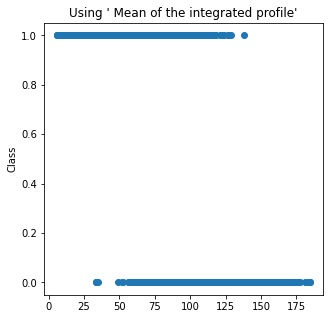

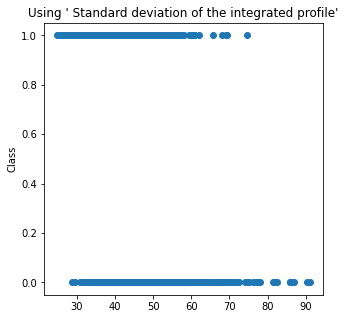

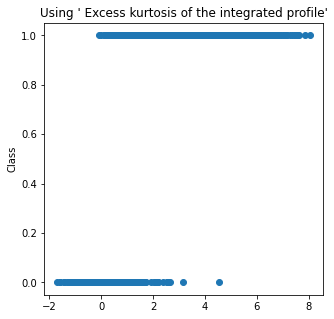

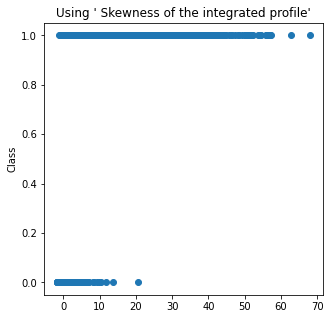

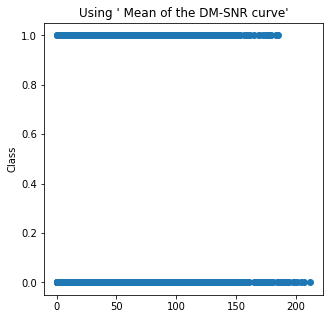

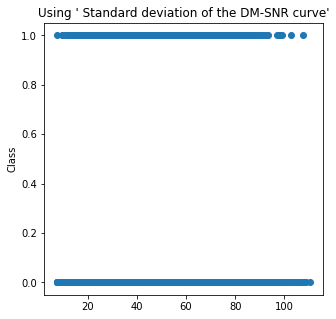

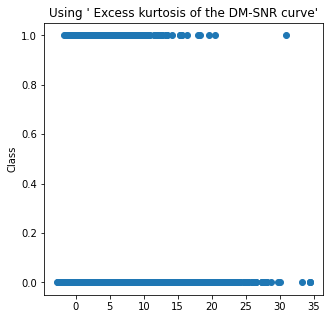

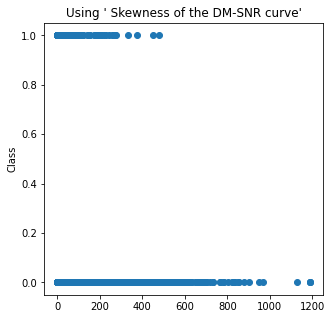

In [16]:
for column in column_names:
    plt.figure(figsize=(5,5))
    plt.scatter(x=X_train[column],y=y_train)
    plt.title(f"Using '{column}'")
    plt.ylabel("Class")

#### Boxplots

In [17]:
import seaborn as sns


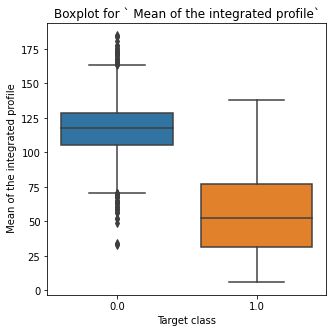

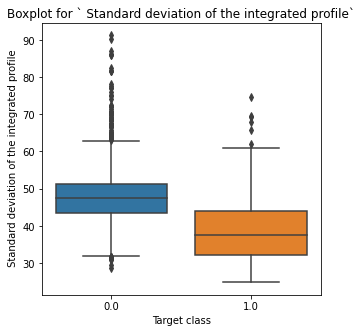

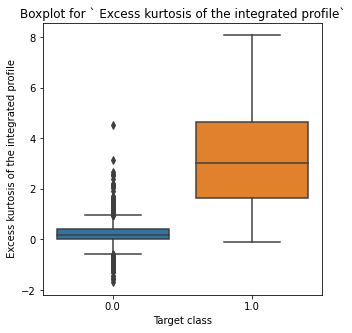

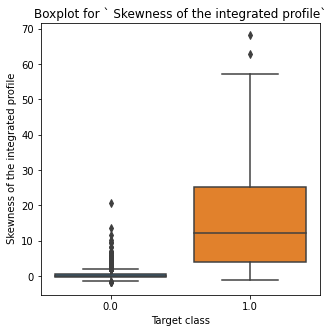

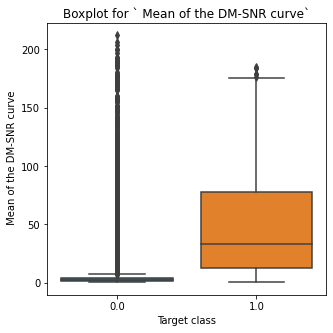

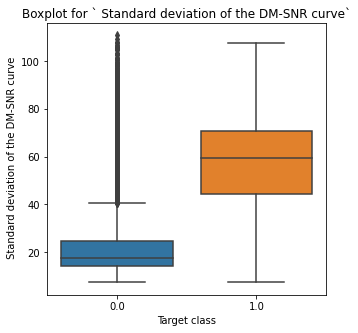

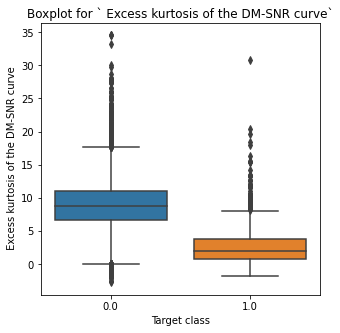

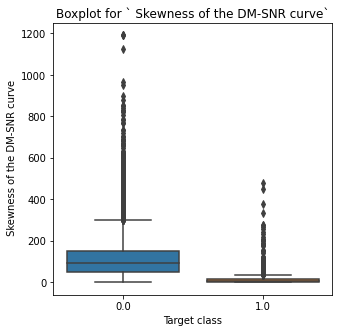

In [18]:
for column in column_names:
    plt.figure(figsize=(5,5))
    sns.boxplot(x=y_train,y=df[column])
    plt.xlabel("Target class")
    plt.title(f"Boxplot for `{column}`")

#### Histograms

/tmp/ipykernel_23614/39352217.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  X_train.hist(bins=50, ax=ax)


array([[<AxesSubplot:title={'center':' Mean of the integrated profile'}>,
        <AxesSubplot:title={'center':' Standard deviation of the integrated profile'}>,
        <AxesSubplot:title={'center':' Excess kurtosis of the integrated profile'}>],
       [<AxesSubplot:title={'center':' Skewness of the integrated profile'}>,
        <AxesSubplot:title={'center':' Mean of the DM-SNR curve'}>,
        <AxesSubplot:title={'center':' Standard deviation of the DM-SNR curve'}>],
       [<AxesSubplot:title={'center':' Excess kurtosis of the DM-SNR curve'}>,
        <AxesSubplot:title={'center':' Skewness of the DM-SNR curve'}>,
        <AxesSubplot:>]], dtype=object)

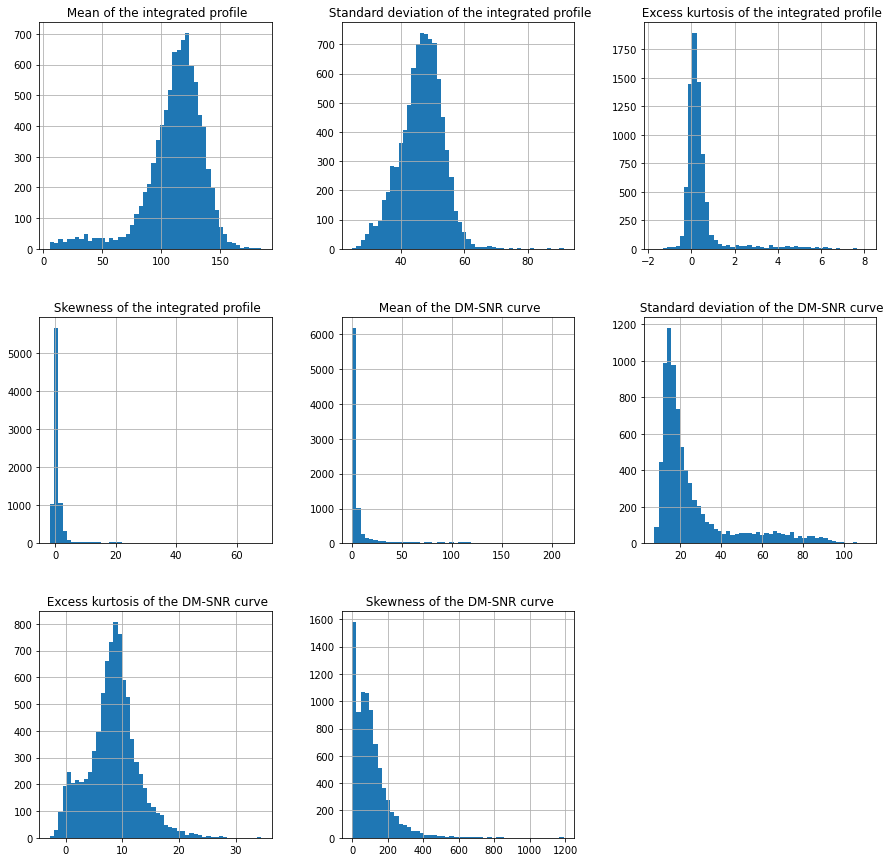

In [19]:
fig, ax = plt.subplots(figsize=(15, 15))
X_train.hist(bins=50, ax=ax)


#### Correlations

In [20]:
df_train = X_train.copy()
df_train["target_class"] = y_train

In [21]:
df_train.corr()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.000000,0.558374,-0.874387,-0.743867,-0.305898,-0.313378,0.236793,0.150382,-0.682361
Standard deviation of the integrated profile,0.558374,1.000000,-0.534127,-0.547271,-0.015247,-0.059067,0.034026,0.030011,-0.370298
Excess kurtosis of the integrated profile,-0.874387,-0.534127,1.000000,0.946440,0.421952,0.439662,-0.342297,-0.218360,0.798872
Skewness of the integrated profile,-0.743867,-0.547271,0.946440,1.000000,0.426788,0.427451,-0.333764,-0.208810,0.718004
Mean of the DM-SNR curve,-0.305898,-0.015247,0.421952,0.426788,1.000000,0.803931,-0.615527,-0.358160,0.404433
Standard deviation of the DM-SNR curve,-0.313378,-0.059067,0.439662,0.427451,0.803931,1.000000,-0.809596,-0.579495,0.492912
Excess kurtosis of the DM-SNR curve,0.236793,0.034026,-0.342297,-0.333764,-0.615527,-0.809596,1.000000,0.925970,-0.387920
Skewness of the DM-SNR curve,0.150382,0.030011,-0.218360,-0.208810,-0.358160,-0.579495,0.925970,1.000000,-0.260183
target_class,-0.682361,-0.370298,0.798872,0.718004,0.404433,0.492912,-0.387920,-0.260183,1.000000


In [22]:
import seaborn as sns

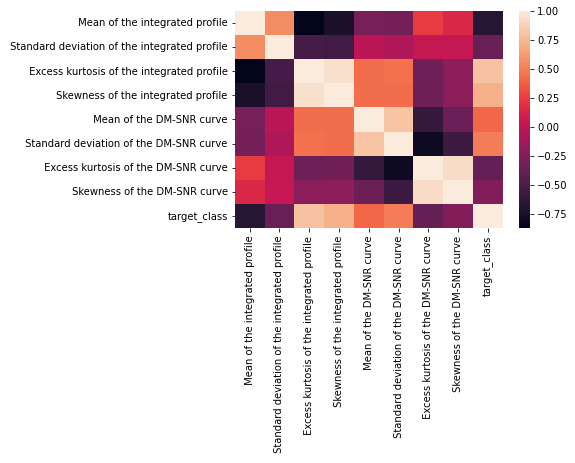

In [23]:
sns.heatmap(df_train.corr());

There are strong correlations between some parameters.

## 3. Missing values

Filling the missing values in the training set, dropping the missing values in the test set to get realistic test results.

In [24]:
X_train.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1210
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve           838
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     456
dtype: int64

In [25]:
# We replace the NaN values with the median of that column in the corresponding target class.
for column in column_names:
    df_train[column].fillna(df_train[column].mean(),inplace=True)
    #df_train[column] = df_train.groupby(["target_class"],sort=False)[column].apply(lambda x: x.fillna(x.median())) # other idea

In [26]:
X_train = df_train.drop(["target_class"], axis=1)
y_train = df_train["target_class"]

In [27]:
X_train.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
dtype: int64

In [28]:
print(f"Number of test data: {len(X_test)}")
X_test.isnull().sum()

Number of test data: 3759


 Mean of the integrated profile                    0
 Standard deviation of the integrated profile      0
 Excess kurtosis of the integrated profile       525
 Skewness of the integrated profile                0
 Mean of the DM-SNR curve                          0
 Standard deviation of the DM-SNR curve          340
 Excess kurtosis of the DM-SNR curve               0
 Skewness of the DM-SNR curve                    169
dtype: int64

In [29]:
# Dropping the NaN rows from the test set
null_indices = []
for column in column_names:
    null_indices_temp = X_test[X_test[column].isnull()].index.tolist()
    null_indices.append(null_indices_temp)
null_indices_list = []
for sublist in null_indices:
    for item in sublist:
        null_indices_list.append(item)
null_indices_list = list(set(null_indices_list))
X_test = X_test.dropna()
y_test = y_test.drop(null_indices_list)


In [30]:
X_test.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
dtype: int64

In [31]:
print(f"Number of test data after dropping missing values: {len(X_test)}, {len(y_test)}")

Number of test data after dropping missing values: 2810, 2810


## 4. Standardizing

Standardizing `X_train` and `X_test` datasets with the mean and standard deviation from the training set.

In [32]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [33]:
for column in column_names:
    mean_ = X_train[column].mean()
    std_ = X_train[column].std()
    X_train_scaled[column] = (X_train[column] - mean_)/std_
    X_test_scaled[column] = (X_test[column] - mean_)/std_
    
X_train_scaled.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
12456,-1.002621,-1.064038,0.312024,-0.028320,-0.192661,0.315168,-0.611679,-0.711334
11463,-0.519303,0.521214,0.071757,-0.279010,0.108891,1.120539,-1.161793,-0.937774
11859,0.090072,0.157489,-0.266816,-0.319953,-0.398041,-0.848574,1.699495,2.052570
10479,1.224884,-0.178531,-0.629289,-0.274563,-0.285812,-0.248758,-0.318990,-0.484634
9519,0.719143,1.467242,-0.556582,-0.332430,-0.360845,-0.614785,0.276753,0.068999


In [34]:
X_test_scaled.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
5812,0.155827,1.336331,-0.388055,-0.357737,-0.307823,-0.170616,-0.274899,-0.512756
983,-0.096892,0.210190,-0.299606,-0.269127,-0.381722,-0.635212,0.967552,0.678132
1417,0.881259,0.002648,-0.459486,-0.275288,-0.373418,-0.779743,0.824590,0.926236
9402,0.346124,0.098263,-0.233001,-0.280214,-0.047097,0.895210,-0.954415,-0.870068
1811,-1.015045,-1.778305,0.202978,0.316541,-0.363342,-0.642873,0.464163,0.274894


In [35]:
len(X_test_scaled)

2810

### Saving the dataset

In [36]:
training_set = pd.concat([X_train_scaled,y_train],axis=1)
print(f"Training set size: {len(training_set)}")
print(f"Positive samples in the training set: {len(training_set.loc[training_set['target_class']==1])}")
testing_set = pd.concat([X_test_scaled,y_test],axis=1)
print(f"Testing set size: {len(testing_set)}")
print(f"Positive samples in the testing set: {len(testing_set.loc[testing_set['target_class']==1])}")
data_scaled = pd.concat([training_set,testing_set],axis=0)

Training set size: 8769
Positive samples in the training set: 800
Testing set size: 2810
Positive samples in the testing set: 268


In [37]:
data_scaled.to_csv('data_scaled.csv',header=False,index=False)

# II. Models: Training, evaluating and tuning

We'll use:

0. Logistic regression as baseline model
1. SVC
2. Random forest
3. XGBoost

We'll use `balanced accuracy` as error metric: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html
because the dataset is imbalanced.

In [38]:
# Imbalanced dataset
len(y_train[y_train == 1]), len(y_train[y_train == 0])

(800, 7969)

In [39]:
# We'll save the results of the models
train_results = {}
test_results = {}

In [40]:
# Confusin matrix
from sklearn.metrics import confusion_matrix
def print_report(model, X, y):
    y_pred = model.predict(X)
    cm = pd.DataFrame(confusion_matrix(y_pred=y_pred, y_true=y, labels=model.classes_), 
                      columns=model.classes_, index=model.classes_)
    cm.index.name = 'True'
    cm.columns.name = 'Predicted'
    return cm

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 0. Logistic regression --- Baseline model

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
model_logistic = LogisticRegression(max_iter = 10000)

In [44]:
model_logistic.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=10000)

In [45]:
len(X_train_scaled)
len(X_test_scaled)

2810

In [46]:
# Saving the results
y_pred = model_logistic.predict(X_train_scaled)
train_results["Logistic regression"] = balanced_accuracy_score(y_train,y_pred)
y_pred = model_logistic.predict(X_test_scaled)
test_results["Logistic regression"] = balanced_accuracy_score(y_test,y_pred)

In [47]:
train_results, test_results

({'Logistic regression': 0.8903667335926716},
 {'Logistic regression': 0.8865815493735101})

In [48]:
# Confusion matrix on the training set
print_report(model_logistic,X_train_scaled,y_train)

Predicted,0.0,1.0
True,,
0.0,7935,34
1.0,172,628


In [49]:
# Confusion matrix on the test set
print_report(model_logistic,X_test_scaled,y_test)

Predicted,0.0,1.0
True,,
0.0,2525,17
1.0,59,209


In [50]:
# Classification report
y_pred = model_logistic.predict(X_test_scaled)
report_logistic = classification_report(y_test,y_pred,labels=[0,1])

In [51]:
print(report_logistic)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2542
           1       0.92      0.78      0.85       268

    accuracy                           0.97      2810
   macro avg       0.95      0.89      0.92      2810
weighted avg       0.97      0.97      0.97      2810



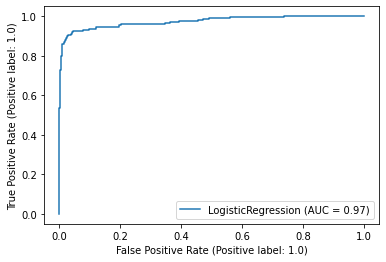

In [52]:
metrics.plot_roc_curve(model_logistic, X_test_scaled, y_test) 
plt.show();

Not bad.

## 1. SVC

In [53]:
from sklearn.svm import SVC

### Linear kernel

In [54]:
# Using the default parameters
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train_scaled, y_train)
y_pred = svc_linear.predict(X_train_scaled)
print(f"Training accuracy: {balanced_accuracy_score(y_train,y_pred)}")
y_pred = svc_linear.predict(X_test_scaled)
print(f"Test accuracy: {balanced_accuracy_score(y_test,y_pred)}")

Training accuracy: 0.8919304492408081
Test accuracy: 0.8909029792031189


In [55]:
# Using grid search for optimal parameters
from sklearn.model_selection import GridSearchCV

In [56]:
%%time
# 1st round
tuned_parameters = [{'C': [0.2,0.3,0.4,0.5,0.6]}]
svc_linear = GridSearchCV(SVC(kernel='linear'), 
                   param_grid=tuned_parameters, 
                   cv=10, 
                   refit=True,
                   scoring='balanced_accuracy')
svc_linear.fit(X_train_scaled, y_train)
y_pred = svc_linear.predict(X_train_scaled)
print(f"Training accuracy: {balanced_accuracy_score(y_train,y_pred)}")
y_pred = svc_linear.predict(X_test_scaled)
print(f"Test accuracy: {balanced_accuracy_score(y_test,y_pred)}")

Training accuracy: 0.8913054492408081
Test accuracy: 0.8909029792031189
CPU times: user 12.1 s, sys: 0 ns, total: 12.1 s
Wall time: 12.1 s


In [57]:
# Best parameters
svc_linear.best_params_

{'C': 0.5}

In [58]:
%%time
# 2nd round
tuned_parameters = [{'C': [0.45,0.5,0.55]}]
svc_linear = GridSearchCV(SVC(kernel='linear'), 
                   param_grid=tuned_parameters, 
                   cv=10, 
                   refit=True,
                   scoring='balanced_accuracy')
svc_linear.fit(X_train_scaled, y_train)
y_pred = svc_linear.predict(X_train_scaled)
print(f"Training accuracy: {balanced_accuracy_score(y_train,y_pred)}")
y_pred = svc_linear.predict(X_test_scaled)
print(f"Test accuracy: {balanced_accuracy_score(y_test,y_pred)}")

Training accuracy: 0.8906804492408081
Test accuracy: 0.8909029792031189
CPU times: user 7.41 s, sys: 0 ns, total: 7.41 s
Wall time: 7.41 s


In [59]:
# Best parameters
svc_linear.best_params_

{'C': 0.45}

In [60]:
# Confusion matrix on the training set
print_report(svc_linear,X_train_scaled,y_train)

Predicted,0.0,1.0
True,,
0.0,7940,29
1.0,172,628


In [61]:
# Confusion matrix on the test set
print_report(svc_linear,X_test_scaled,y_test)

Predicted,0.0,1.0
True,,
0.0,2528,14
1.0,57,211


In [62]:
# Saving the results
y_pred = svc_linear.predict(X_train_scaled)
train_results["SVC linear"] = balanced_accuracy_score(y_train,y_pred)
y_pred = svc_linear.predict(X_test_scaled)
test_results["SVC linear"] = balanced_accuracy_score(y_test,y_pred)

In [63]:
# Classification report
y_pred = svc_linear.predict(X_test_scaled)
report_svc_linear = classification_report(y_test,y_pred,labels=[0,1])

In [64]:
print(report_svc_linear)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2542
           1       0.94      0.79      0.86       268

    accuracy                           0.97      2810
   macro avg       0.96      0.89      0.92      2810
weighted avg       0.97      0.97      0.97      2810



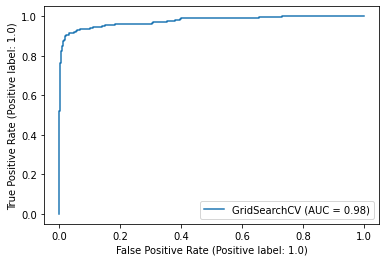

In [65]:
metrics.plot_roc_curve(svc_linear, X_test_scaled, y_test) 
plt.show();

### Radial kernel

In [66]:
%%time
# 1st round
# Fitting an SVM with radial kernel with default settings
svc_radial = SVC(kernel='rbf')
svc_radial.fit(X_train_scaled, y_train)

# Training and testing scores
y_pred = svc_radial.predict(X_train_scaled)
print(f"Training accuracy: {balanced_accuracy_score(y_train,y_pred)}")
y_pred = svc_radial.predict(X_test_scaled)
print(f"Test accuracy: {balanced_accuracy_score(y_test,y_pred)}")

# Finding the optimal C and gamma with grid search
tuned_parameters = [{'C': [0.01,1.0,2.0],
                     'gamma': [0.5,1,2]}]
svc_radial = GridSearchCV(SVC(kernel='rbf'), 
                   param_grid=tuned_parameters, 
                   cv=10,
                   refit=True,
                   scoring='balanced_accuracy')
svc_radial.fit(X_train_scaled, y_train)
y_pred = svc_radial.predict(X_train_scaled)
print(f"Training accuracy: {balanced_accuracy_score(y_train,y_pred)}")
y_pred = svc_radial.predict(X_test_scaled)
print(f"Test accuracy: {balanced_accuracy_score(y_test,y_pred)}")

Training accuracy: 0.90211867862969
Test accuracy: 0.8963032986131498
Training accuracy: 0.9162451374074538
Test accuracy: 0.900034641896732
CPU times: user 1min 36s, sys: 1.62 s, total: 1min 37s
Wall time: 1min 37s


In [67]:
# Best parameters
svc_radial.best_params_

{'C': 1.0, 'gamma': 0.5}

In [68]:
%%time
# 2nd round

# Finding the optimal C and gamma with grid search
tuned_parameters = [{'C': [0.8,0.9,1.0,1.1,1.2],
                     'gamma': [0.4,0.5,0.6]}]
svc_radial = GridSearchCV(SVC(kernel='rbf'), 
                   param_grid=tuned_parameters, 
                   cv=10,
                   refit=True,
                   scoring='balanced_accuracy')
svc_radial.fit(X_train_scaled, y_train)
y_pred = svc_radial.predict(X_train_scaled)
print(f"Training accuracy: {balanced_accuracy_score(y_train,y_pred)}")
y_pred = svc_radial.predict(X_test_scaled)
print(f"Test accuracy: {balanced_accuracy_score(y_test,y_pred)}")

Training accuracy: 0.9162451374074538
Test accuracy: 0.900034641896732
CPU times: user 1min 27s, sys: 2.78 ms, total: 1min 27s
Wall time: 1min 27s


In [69]:
# Best parameters
svc_radial.best_params_

{'C': 1.0, 'gamma': 0.5}

In [70]:
# Confusion matrix on the training set
print_report(svc_radial,X_train_scaled,y_train)

Predicted,0.0,1.0
True,,
0.0,7949,20
1.0,132,668


In [71]:
# Confusion matrix on the test set
print_report(svc_radial,X_test_scaled,y_test)

Predicted,0.0,1.0
True,,
0.0,2527,15
1.0,52,216


In [72]:
svc_radial = SVC(kernel='rbf')
svc_radial.fit(X_train_scaled, y_train)
#svc_radial.predict_proba(X_test)

SVC()

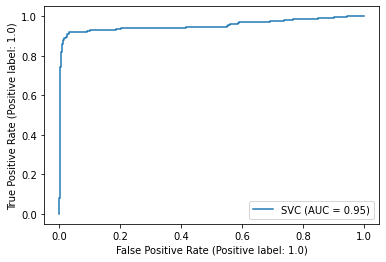

In [73]:
metrics.plot_roc_curve(svc_radial, X_test_scaled, y_test) 
plt.show();

In [74]:
# Saving the results
y_pred = svc_radial.predict(X_train_scaled)
train_results["SVC radial"] = balanced_accuracy_score(y_train,y_pred)
y_pred = svc_radial.predict(X_test_scaled)
test_results["SVC radial"] = balanced_accuracy_score(y_test,y_pred)
print(f"Training results: {train_results}")
print(test_results)

Training results: {'Logistic regression': 0.8903667335926716, 'SVC linear': 0.8906804492408081, 'SVC radial': 0.90211867862969}
{'Logistic regression': 0.8865815493735101, 'SVC linear': 0.8909029792031189, 'SVC radial': 0.8963032986131498}


In [75]:
# Classification report
y_pred = svc_radial.predict(X_test_scaled)
report_svc_radial = classification_report(y_test,y_pred,labels=[0,1])

In [76]:
print(report_svc_radial)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2542
           1       0.93      0.80      0.86       268

    accuracy                           0.98      2810
   macro avg       0.96      0.90      0.92      2810
weighted avg       0.97      0.98      0.97      2810



### Polynomial kernel

In [77]:
svc_poly = SVC(kernel='poly',degree=2)
svc_poly.fit(X_train_scaled, y_train)

# Training and testing scores
y_pred = svc_poly.predict(X_train_scaled)
print(f"Training accuracy: {balanced_accuracy_score(y_train,y_pred)}")
y_pred = svc_poly.predict(X_test_scaled)
print(f"Test accuracy: {balanced_accuracy_score(y_test,y_pred)}")


Training accuracy: 0.8572465961852178
Test accuracy: 0.8402377373557077


In [78]:
%%time
# 1st round

# Grid search for optimal parameters
tuned_parameters = [{'C': [0.5,1.0,2.0],
                     'gamma': [0.5, 1, 2]}]
svc_poly = GridSearchCV(SVC(kernel='poly', coef0=1, degree=2), 
                   param_grid=tuned_parameters, 
                   cv=10,
                   refit=True,
                   scoring='balanced_accuracy')
svc_poly.fit(X_train_scaled, y_train)
y_pred = svc_poly.predict(X_train_scaled)
print(f"Training accuracy: {balanced_accuracy_score(y_train,y_pred)}")
y_pred = svc_poly.predict(X_test_scaled)
print(f"Test accuracy: {balanced_accuracy_score(y_test,y_pred)}")

Training accuracy: 0.9088054492408082
Test accuracy: 0.9054349613067627
CPU times: user 2min 31s, sys: 0 ns, total: 2min 31s
Wall time: 2min 31s


In [79]:
# Best parameters
svc_poly.best_params_

{'C': 1.0, 'gamma': 2}

In [ ]:
%%time
# 2nd round

# Grid search for optimal parameters
tuned_parameters = [{'C': [0.9,1.0,1.1],
                     'gamma': [1.9, 2, 2.1]}]
svc_poly = GridSearchCV(SVC(kernel='poly', coef0=1, degree=2), 
                   param_grid=tuned_parameters, 
                   cv=10,
                   refit=True,
                   scoring='balanced_accuracy')
svc_poly.fit(X_train_scaled, y_train)
y_pred = svc_poly.predict(X_train_scaled)
print(f"Training accuracy: {balanced_accuracy_score(y_train,y_pred)}")
y_pred = svc_poly.predict(X_test_scaled)
print(f"Test accuracy: {balanced_accuracy_score(y_test,y_pred)}")

In [ ]:
# Best parameters
svc_poly.best_params_

In [ ]:
# Confusion matrix on the training set
print_report(svc_poly,X_train_scaled,y_train)

In [ ]:
# Confusion matrix on the test set
print_report(svc_poly,X_test_scaled,y_test)

In [ ]:
# Saving the results
y_pred = svc_poly.predict(X_train_scaled)
train_results["SVC polynomial"] = balanced_accuracy_score(y_train,y_pred)
y_pred = svc_poly.predict(X_test_scaled)
test_results["SVC polynomial"] = balanced_accuracy_score(y_test,y_pred)
print(train_results)
print(test_results)

In [ ]:
# Classification report
y_pred = svc_poly.predict(X_test_scaled)
report_svc_poly = classification_report(y_test,y_pred,labels=[0,1])

In [ ]:
print(report_svc_poly)

In [ ]:
metrics.plot_roc_curve(svc_poly, X_test_scaled, y_test) 
plt.show();

## 2. Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [ ]:
%%time
results = {}
importances = {}
X_names = column_names
for n_estimators in np.arange(10,200,10):
    print(n_estimators)
    random_forest_temp = RandomForestClassifier(n_estimators = n_estimators, random_state = 17)
    random_forest_temp.fit(X_train_scaled, y_train)
    y_pred_train = random_forest_temp.predict(X_train_scaled)
    y_pred_test = random_forest_temp.predict(X_test_scaled)
    results[n_estimators] = [ balanced_accuracy_score(y_train,y_pred_train),balanced_accuracy_score(y_test,y_pred_test)]
    feature_importance = pd.Series(random_forest_temp.feature_importances_,index = X_names).sort_values(ascending=False)
    importances[n_estimators] = feature_importance

In [ ]:
np.arange(10,200,10)

In [ ]:
results

In [ ]:
# Converting the results to a numpy array
results_array = np.array(list(results.values()))

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(list(results.keys()),results_array[:,0],label="Training score")
plt.plot(list(results.keys()),results_array[:,1],label="Testing score")
plt.legend()
plt.show()

**Conclusion:**

The maximum testing score is at `n_estimators = 130`

In [ ]:
importances[130]

In [ ]:
importance=importances[130]
x = np.arange(1,9)
plt.bar(x,importance,tick_label = importance.keys())
plt.xticks(rotation=90)
plt.title('Feature importances')
plt.show()

In [ ]:
# Confusion matrix on the training set
random_forest_temp = RandomForestClassifier(n_estimators = 130, random_state = 17)
random_forest_temp.fit(X_train_scaled,y_train)
print_report(random_forest_temp, X_train_scaled, y_train)

In [ ]:
# Confusion matrix on the test set
print_report(random_forest_temp, X_test_scaled, y_test)

In [ ]:
# Saving the results
train_results["Random forest"] = results[130][0]
test_results["Random forest"] = results[130][1]
print(train_results)
print(test_results)

In [ ]:
# Classification report
y_pred = random_forest_temp.predict(X_test_scaled)
report_random_forest_temp = classification_report(y_test,y_pred,labels=[0,1])
print(report_random_forest_temp)

In [ ]:
balanced_accuracy_score(y_test,y_pred)

In [ ]:
metrics.plot_roc_curve(random_forest_temp, X_test_scaled, y_test) 
plt.show();

## 3. XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [ ]:
# Train the model
model_xgb = xgb.XGBClassifier(use_label_encoder=False,objective="binary:logistic")
model_xgb.fit(X_train_scaled, y_train,eval_metric="auc")
# Training and testing scores
y_pred_train = model_xgb.predict(X_train_scaled)
y_pred_test = model_xgb.predict(X_test_scaled)
print(f"Training accuracy: {balanced_accuracy_score(y_train,y_pred_train)}")
print(f"Test accuracy: {balanced_accuracy_score(y_test,y_pred_test)}")

In [ ]:
# Feature importance
importance = pd.Series(model_xgb.feature_importances_,index = X_names).sort_values(ascending=False)
x = np.arange(1,9)
plt.bar(x,importance,tick_label = importance.keys())
plt.xticks(rotation=90)
plt.title('Feature importances')
plt.show()

In [ ]:
# confusion matrix on the training set
print_report(model_xgb, X_train_scaled, y_train)

In [ ]:
# confusion matrix on the test set
print_report(model_xgb, X_test_scaled, y_test)

In [ ]:
%%time
# 1st round

# Grid search for optimal parameters
tuned_parameters = {
        'min_child_weight': [1, 5],
        'gamma': [0, 5],
        'subsample': [0, 0.5, 1.0],
        'colsample_bytree': [0.2, 0.5, 1.0],
        'max_depth': [4, 6]
        }
xgb_cv = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False,objective="binary:logistic"), 
                   param_grid=tuned_parameters, 
                   cv=10,
                   refit=True,
                   scoring='balanced_accuracy')
xgb_cv.fit(X_train_scaled, y_train,eval_metric="auc")
y_pred = xgb_cv.predict(X_train_scaled)
print(f"Training accuracy: {balanced_accuracy_score(y_train,y_pred)}")
y_pred = xgb_cv.predict(X_test_scaled)
print(f"Test accuracy: {balanced_accuracy_score(y_test,y_pred)}")

In [ ]:
# Best parameters
xgb_cv.best_params_

In [ ]:
# confusion matrix on the test set
print_report(xgb_cv, X_test_scaled, y_test)

In [ ]:
%%time
# 2nd round

# Grid search for optimal parameters
tuned_parameters = {
        'min_child_weight': [5, 10, 15],
        'gamma': [0, 0.1, 0.2],
        'subsample': [0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'max_depth': [6]
        }
xgb_cv = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False,objective="binary:logistic"), 
                   param_grid=tuned_parameters, 
                   cv=10,
                   refit=True,
                   scoring='balanced_accuracy')
xgb_cv.fit(X_train_scaled, y_train,eval_metric="auc")
y_pred = xgb_cv.predict(X_train_scaled)
print(f"Training accuracy: {balanced_accuracy_score(y_train,y_pred)}")
y_pred = xgb_cv.predict(X_test_scaled)
print(f"Test accuracy: {balanced_accuracy_score(y_test,y_pred)}")

In [ ]:
# Best parameters
xgb_cv.best_params_

In [ ]:
# confusion matrix on the test set
print_report(xgb_cv, X_test_scaled, y_test)

In [ ]:
# Saving the results
y_pred = xgb_cv.predict(X_train_scaled)
train_results["XGBoost"] = balanced_accuracy_score(y_train,y_pred)
y_pred = xgb_cv.predict(X_test_scaled)
test_results["XGBoost"] = balanced_accuracy_score(y_test,y_pred)
print(train_results)
print(test_results)

In [ ]:
# Classification report
y_pred = xgb_cv.predict(X_test_scaled)
report_xgb = classification_report(y_test,y_pred,labels=[0,1])
print(report_xgb)

## Conclusion


In [ ]:
training_df = pd.DataFrame.from_dict(train_results,orient='index',columns=["Training balanced acc."])
testing_df = pd.DataFrame.from_dict(test_results,orient='index',columns=["Testing balanced acc."])
results_df = pd.concat([training_df,testing_df],axis=1)

In [ ]:
results_df

In [ ]:
results_df.plot(kind='bar',figsize=(7,7))
plt.xticks(rotation=90);

**Conclusion**: the best model with the chosen score (highest balanced accuracy on the test set) is **XGBoost**.



# III. Other type of tuning for the imbalanced dataset problem

We'll use here some extra tricks to tweak the `XGBoost` model.
We're going to oversample the minor class by `SMOTE`.

## Oversampling

It can cause problems, that the dataset is imbalanced. That's why we use SMOTE for oversampling the minority class.

In [ ]:
df_train.head()

In [ ]:
#!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(sampling_strategy='minority', random_state=7)

In [ ]:
oversampled_train_X, oversampled_train_y = sm.fit_resample(df_train.drop('target_class', axis=1), df_train['target_class'])

In [ ]:
oversampled_train_y.sum(), len(oversampled_train_y)

In [ ]:
df_train = pd.concat([oversampled_train_y, oversampled_train_X],axis=1)
df_train.head()

## Standardizing

We've to standardizing again.

In [ ]:
X_train_oversampled_scaled = df_train.drop(["target_class"], axis=1)
y_train = df_train["target_class"]
X_test_oversampled_scaled = X_test.copy()

In [ ]:
for column in column_names:
    mean_ = X_train_oversampled_scaled[column].mean()
    std_ = X_train_oversampled_scaled[column].std()
    X_train_oversampled_scaled[column] = (X_train_oversampled_scaled[column] - mean_)/std_
    X_test_oversampled_scaled[column] = (X_test_oversampled_scaled[column] - mean_)/std_
    
X_train_oversampled_scaled.head()

In [ ]:
type(X_train_oversampled_scaled)

In [ ]:
training_set = pd.concat([X_train_oversampled_scaled,y_train],axis=1)

In [ ]:
training_set = training_set.sample(frac=1).reset_index(drop=True)

In [ ]:
training_set.head()

### Saving the dataset

In [ ]:
#training_set = pd.concat([X_train_oversampled_scaled,y_train],axis=1)
print(f"Training set size: {len(training_set)}")
print(f"Positive samples in the training set: {len(training_set.loc[training_set['target_class']==1])}")
testing_set = pd.concat([X_test_oversampled_scaled,y_test],axis=1)
print(f"Testing set size: {len(testing_set)}")
print(f"Positive samples in the testing set: {len(testing_set.loc[testing_set['target_class']==1])}")
data_oversampled_scaled = pd.concat([training_set,testing_set],axis=0)

In [ ]:
data_oversampled_scaled.to_csv('data_oversampled_scaled.csv',header=False,index=False)

In [ ]:
len(data_oversampled_scaled)

## XGBoost

Since the dataset is balanced, we can use standard `accuracy` for scoring.

In [ ]:
%%time
# 1st round

# Grid search for optimal parameters
tuned_parameters = {
        'min_child_weight': [1, 5],
        'gamma': [0, 5],
        'subsample': [0.5, 1.0],
        'colsample_bytree': [0.5, 1.0],
        'max_depth': [6,8,10]
        }
xgb_cv = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False,objective="binary:logistic"), 
                   param_grid=tuned_parameters, 
                   cv=10,
                   refit=True,
                   scoring='accuracy')
xgb_cv.fit(X_train_oversampled_scaled, y_train,eval_metric="auc")
y_pred = xgb_cv.predict(X_train_oversampled_scaled)
print(f"Training accuracy: {balanced_accuracy_score(y_train,y_pred)}")
y_pred = xgb_cv.predict(X_test_oversampled_scaled)
print(f"Test accuracy: {balanced_accuracy_score(y_test,y_pred)}")

In [ ]:
# Best parameters
xgb_cv.best_params_

In [ ]:
# Confusion matrix on the training set
print_report(xgb_cv,X_train_oversampled_scaled,y_train)

In [ ]:
# Confusion matrix on the test set
print_report(xgb_cv,X_test_oversampled_scaled,y_test)

In [ ]:
%%time
# 2nd round

# Grid search for optimal parameters
tuned_parameters = {
        'min_child_weight': [1,2],
        'gamma': [0,0.1,0.2],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'max_depth': [6,8,10]
        }
xgb_cv = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False,objective="binary:logistic"), 
                   param_grid=tuned_parameters, 
                   cv=10,
                   refit=True,
                   scoring='accuracy')
xgb_cv.fit(X_train_oversampled_scaled, y_train,eval_metric="auc")
y_pred = xgb_cv.predict(X_train_oversampled_scaled)
print(f"Training accuracy: {balanced_accuracy_score(y_train,y_pred)}")
y_pred = xgb_cv.predict(X_test_oversampled_scaled)
print(f"Test accuracy: {balanced_accuracy_score(y_test,y_pred)}")

In [ ]:
# Best parameters
xgb_cv.best_params_

In [ ]:
# Confusion matrix on the test set
print_report(xgb_cv,X_test_oversampled_scaled,y_test)

In [ ]:
metrics.plot_roc_curve(xgb_cv, X_test_oversampled_scaled, y_test) 
plt.show();

## Conclusion

There are fewer false negatives in the oversampled case, but more false positives. This is useful, as it makes it less likely that a real pulsar will be identified as a non-pulsar. The accuracy is in overall very similar, but in the oversampled case it's a little smaller.